In [9]:
import os

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             roc_auc_score,
                             roc_curve,
                             confusion_matrix)
from sklearn.model_selection import (cross_val_score,
                                     GridSearchCV,
                                     RandomizedSearchCV,
                                     learning_curve,
                                     validation_curve,
                                     train_test_split)
from sklearn.metrics import roc_curve, auc

In [10]:
df = pd.read_csv("employee_retention_data.csv")
df['left'] = df['quit_date']
df.loc[df["left"].notna(), "left"] = 1 # left
df.loc[df["left"].isna(), "left"] = 0 # no left
import time
todaysdate = time.strftime("%Y-%m-%d")
df.loc[df["quit_date"].isna(), "quit_date"] = todaysdate

In [11]:
df['quit_date'] = pd.to_datetime(df['quit_date'])
df['join_date'] = pd.to_datetime(df['join_date'])
df['time_spent_company'] = (df['quit_date'].sub(df['join_date'], axis=0).dt.days)*0.003
df['time_spent_company'] = df.time_spent_company.round()
df_visuals = df;
df = pd.get_dummies(df, columns=["dept"], drop_first=False)

In [12]:
#df.isnull().any() # checking for nans
df_visuals.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,left,time_spent_company
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1,2.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,1,1.0
2,927315.0,4,marketing,14,101000.0,2014-10-13,2019-07-18,0,5.0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,1,1.0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1,3.0


In [13]:
list(df.head())

['employee_id',
 'company_id',
 'seniority',
 'salary',
 'join_date',
 'quit_date',
 'left',
 'time_spent_company',
 'dept_customer_service',
 'dept_data_science',
 'dept_design',
 'dept_engineer',
 'dept_marketing',
 'dept_sales']

# EDA

In [14]:
len(df_visuals)

24702

In [15]:
df_visuals['left'].value_counts()

1    13510
0    11192
Name: left, dtype: int64

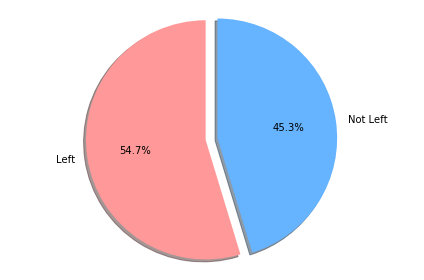

In [17]:
df_left = df['left'].value_counts().reset_index()
df_left.columns = ['left','count']
df_left

# Pie chart
labels = ['Left', 'Not Left']
sizes = df_left['count']
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = [0.1,0]
colors = ['#ff9999','#66b3ff']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, colors = colors,startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
#plt.savefig("True_fit_ratio.png")
plt.show()

In [18]:
df_visuals.groupby(['left']).mean()

,employee_id,company_id,seniority,salary,time_spent_company
left,,,,,
0,501079.237759,3.387688,14.123392,141238.473910,5.513313
1,502039.463138,3.459511,14.131458,135652.405625,1.763731


In [20]:
#cols = ['dept_data_science','dept_design','dept_engineer','dept_marketing','dept_sales']

#sns.set_palette('cubehelix')
#fig,ax = plt.subplots(2,3, figsize=(20,5))
#ax = ax.ravel()
#for i,c in enumerate(cols[:]):
 #   sns.countplot(data=df, y=c, ax=ax[i])
  #  print(i,c)

In [96]:
#fig,ax = plt.subplots(2,1, figsize=(20,7))
##x = [1,0]
#ax = ax.ravel()
#for i in x:
##    tmp = df.loc[df['left']==i,'company_id'].reset_index()
#    sns.countplot(data=tmp,y='company_id',order=tmp['company_id'].value_counts().index,ax=ax[i])

## More visuals

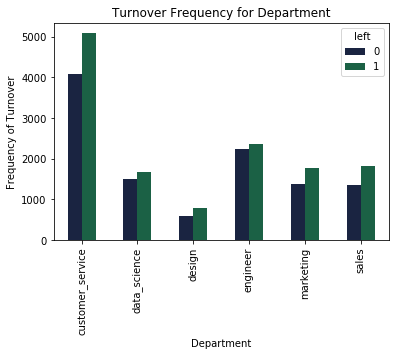

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.crosstab(df_visuals.dept,df_visuals.left).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

Text(0, 0.5, 'Frequency of Turnover')

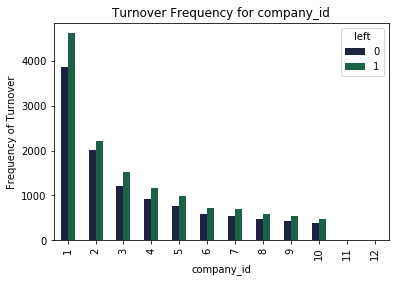

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.crosstab(df_visuals.company_id,df_visuals.left).plot(kind='bar')
plt.title('Turnover Frequency for company_id')
plt.xlabel('company_id')
plt.ylabel('Frequency of Turnover')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e605fd0>,
      dtype=object)

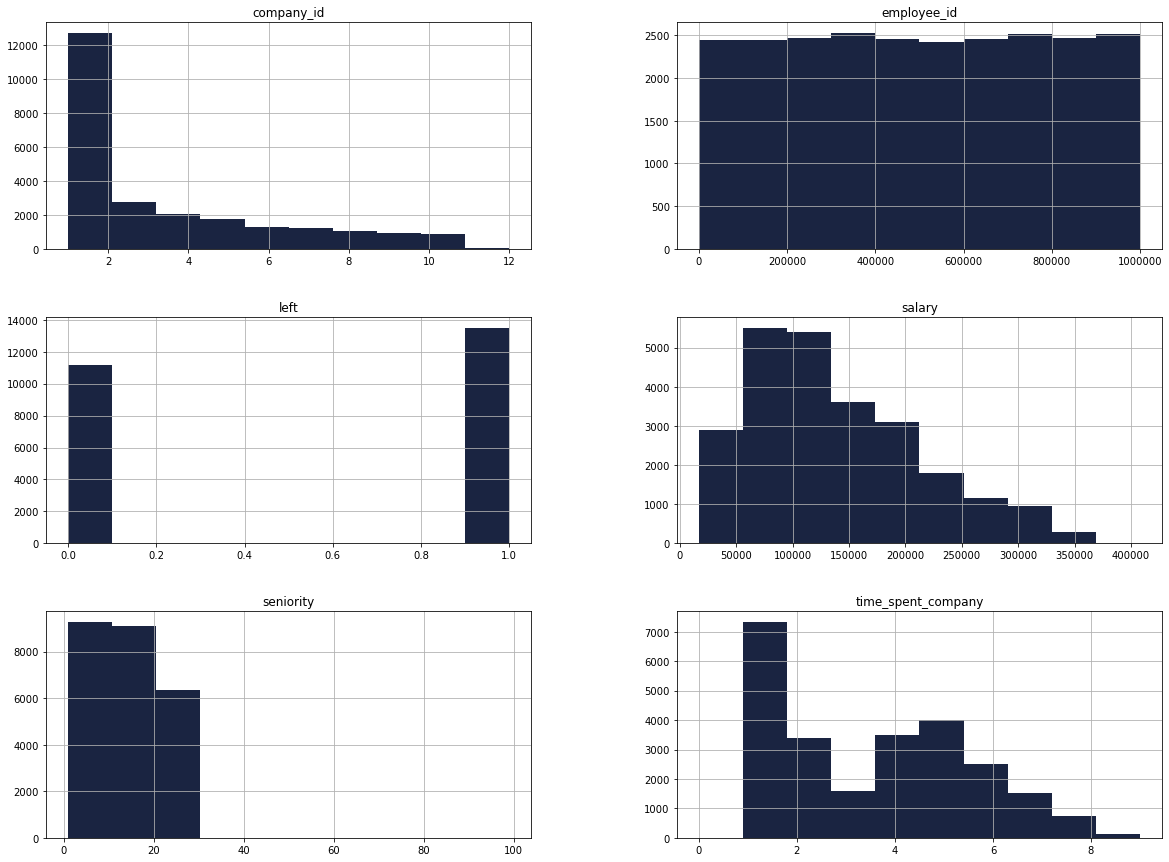

In [23]:
num_bins = 10
df_visuals.hist(bins=num_bins, figsize=(20,15))

In [28]:
xxx = df_visuals.groupby(['left','dept']).mean()["salary"].unstack()
xxx

dept,customer_service,data_science,design,engineer,marketing,sales
left,,,,,,
0,79656.387665,215387.931034,134325.581395,212515.326522,134213.150289,136277.002204
1,84322.143698,199263.376932,139886.889460,198901.354784,136673.022995,135638.321369


<Figure size 1080x720 with 0 Axes>

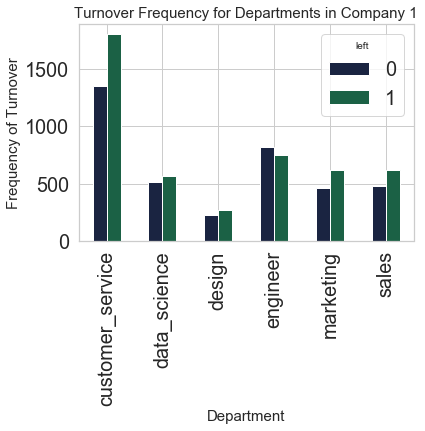

In [257]:
plt.figure(figsize=(15, 10))
#sns.set_style("whitegrid")
#sns.set_palette('cubehelix')
company_1 = df_visuals[(df_visuals['company_id'] == 1)]
pd.crosstab(company_1.dept,company_1.left).plot(kind='bar')
plt.title('Turnover Frequency for Departments in Company 1',fontsize=15)
plt.xlabel('Department',fontsize=15)
plt.ylabel('Frequency of Turnover',fontsize=15)
plt.savefig('department_bar_chart',fontsize=15)

Text(0, 0.5, 'Frequency of Turnover')

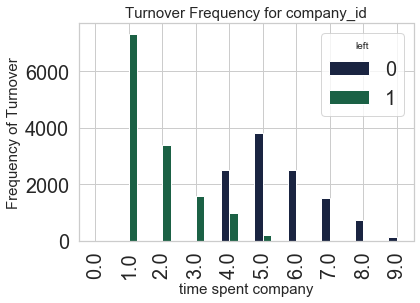

In [277]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.crosstab(df_visuals.time_spent_company,df_visuals.left).plot(kind='bar')
plt.title('Turnover Frequency for company_id',fontsize=15)
plt.xlabel('time spent company',fontsize=15)
plt.ylabel('Frequency of Turnover',fontsize=15)

# Random Forest Model

In [183]:
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from warnings import filterwarnings

In [184]:
df_model =df.drop(columns=['join_date', 'quit_date','employee_id'])

In [186]:
# Convert dataframe into numpy objects and split them into
# train and test sets: 80/20
#X = df_model.loc[:, df_model.columns != "left"].values
#y = df_model.loc[:, df_model.columns == "left"].values.flatten()

cols=['company_id',
 'seniority',
 'salary',
 'time_spent_company',
 'dept_customer_service',
 'dept_data_science',
 'dept_design',
 'dept_engineer',
 'dept_marketing',
 'dept_sales'] 
X=df_model[cols]
y=df_model['left']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=1)

In [187]:
clf_rf =RandomForestClassifier(n_estimators=50,
                                              criterion="entropy",
                                              max_features=0.4,
                                              min_samples_leaf=1,
                                              class_weight="balanced",
                                              n_jobs=-1,
                                              random_state=123)

In [188]:
clf_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features=0.4,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

In [189]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, clf_rf.predict(X_test))))

Random Forest Accuracy: 0.969


In [190]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

/anaconda3/envs/priyainsight/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/priyainsight/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/priyainsight/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/priyainsight/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/priy

10-fold cross validation average accuracy: 0.969


/anaconda3/envs/priyainsight/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/priyainsight/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [191]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      3358
           1       0.99      0.95      0.97      4053

    accuracy                           0.97      7411
   macro avg       0.97      0.97      0.97      7411
weighted avg       0.97      0.97      0.97      7411



In [192]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics

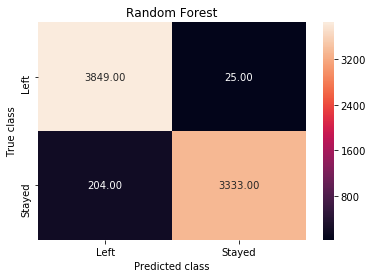

In [193]:
y_pred = clf_rf.predict(X_test)

forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

## Logistic Regression

In [194]:
hr_vars=df_model.columns.values.tolist()
y=['left']
X=[i for i in hr_vars if i not in y]

In [195]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 10)
rfe = rfe.fit(df_model[X], df_model[y])
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1]


/anaconda3/envs/priyainsight/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/priyainsight/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [196]:
cols=['company_id',
 'seniority',
 'salary',
 'time_spent_company',
 'dept_customer_service',
 'dept_data_science',
 'dept_design',
 'dept_engineer',
 'dept_marketing',
 'dept_sales'] 
X=df_model[cols]
y=df_model['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/anaconda3/envs/priyainsight/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [197]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.886


In [198]:
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3307
           1       0.93      0.86      0.89      4104

    accuracy                           0.89      7411
   macro avg       0.89      0.89      0.89      7411
weighted avg       0.89      0.89      0.89      7411



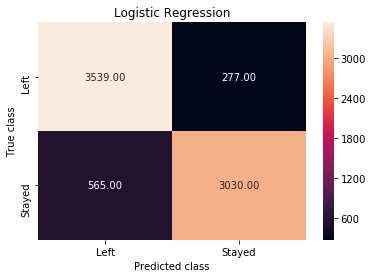

In [199]:
logreg_y_pred = logreg.predict(X_test)
logreg_cm = metrics.confusion_matrix(logreg_y_pred, y_test, [1,0])
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')

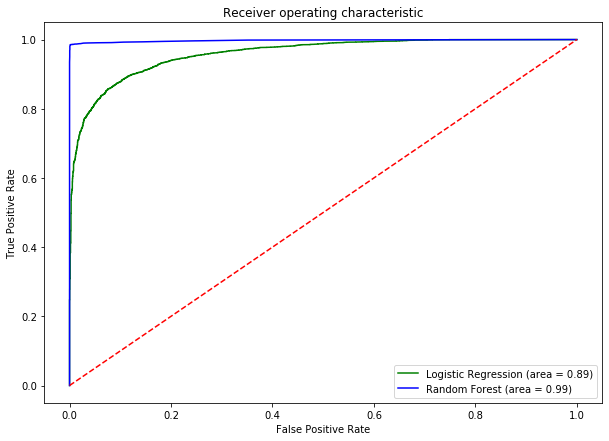

In [200]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, clf_rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, clf_rf.predict_proba(X_test)[:,1])


plt.figure(figsize=(10,7))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc,color='g')
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc,color='b')
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('ROC')
plt.show()

In [201]:
feature_labels = np.array(['company_id',
 'seniority',
 'salary',
 'time_spent_company',
 'dept_customer_service',
 'dept_data_science',
 'dept_design',
 'dept_engineer',
 'dept_marketing',
 'dept_sales'])
importance = clf_rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

dept_design-0.09%
dept_customer_service-0.12%
dept_sales-0.12%
dept_data_science-0.13%
dept_engineer-0.14%
dept_marketing-0.14%
company_id-1.68%
seniority-2.66%
salary-4.59%
time_spent_company-90.32%


In [205]:
feature_indexes_by_importance

array([6, 4, 9, 5, 7, 8, 0, 1, 2, 3])

According to our Random Forest model, the above shows the most important features which influence whether an employee will leave the company, in ascending order.

No handles with labels found to put in legend.


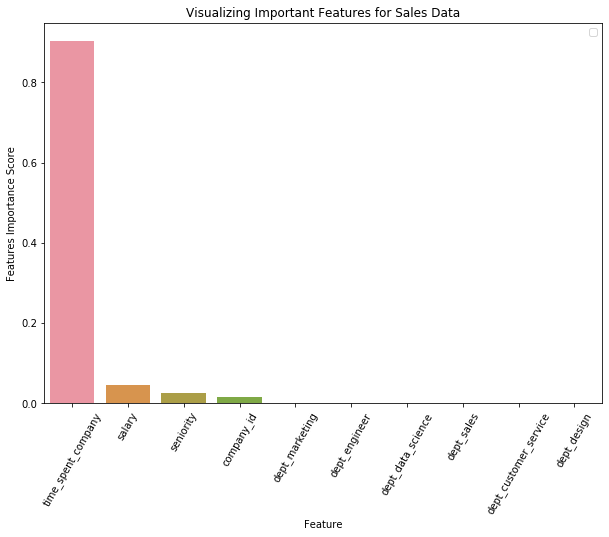

In [213]:
feature_imp = pd.Series(clf_rf.feature_importances_,index=cols).sort_values(ascending=False)
feature_imp
plt.figure(figsize=(10, 7))
sns.barplot(x=feature_imp.index, y=feature_imp)
plt.xlabel('Feature')
plt.ylabel('Features Importance Score')
plt.title("Visualizing Important Features for Sales Data")
plt.legend()
plt.xticks(rotation=60)
plt.show()